In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings( "ignore")

## Importing data

In [2]:
df = pd.read_excel('C:/Users/Susmita Sarkar/Downloads/Election_Data (2).xlsx',index_col=0)

#### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.


## EDA

In [3]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


**Shape**

In [4]:
df.shape

(1525, 9)

**Data type of data features**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


**Null value Check**

In [6]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

**Making different list for categorical columns and numerical columns**


In [7]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [8]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


**Data preprocessing**


In [9]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


**Check for duplicate data**

In [10]:
df.duplicated().sum()

8

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

#### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.


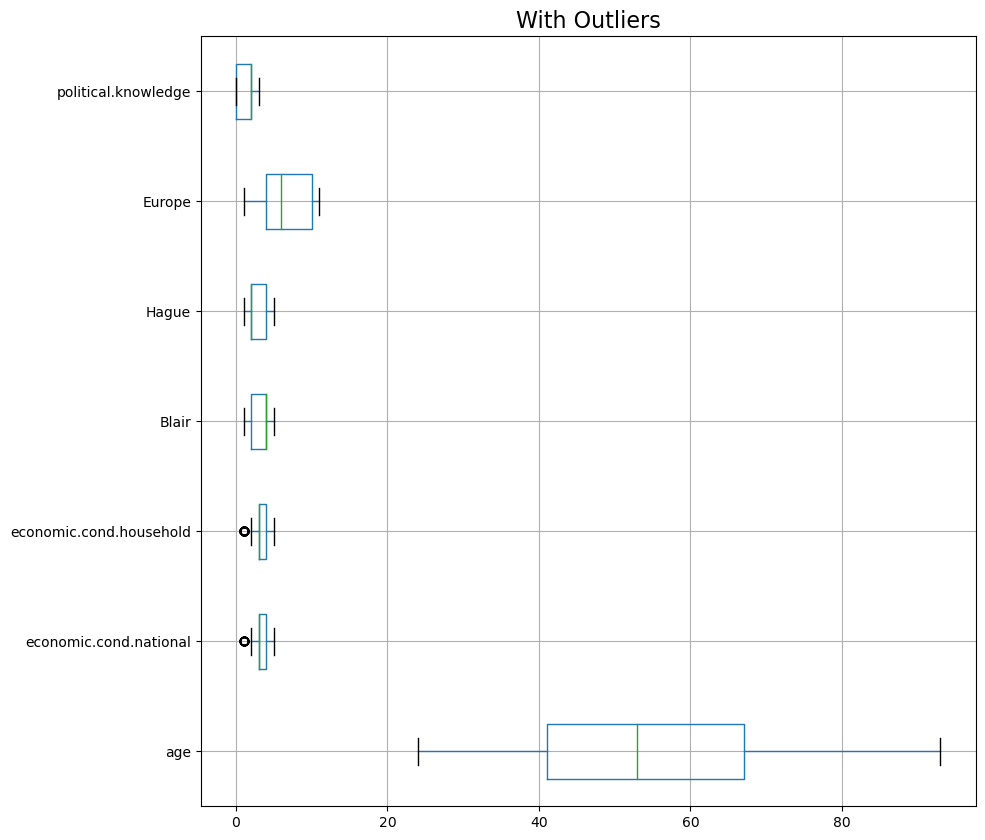

In [13]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

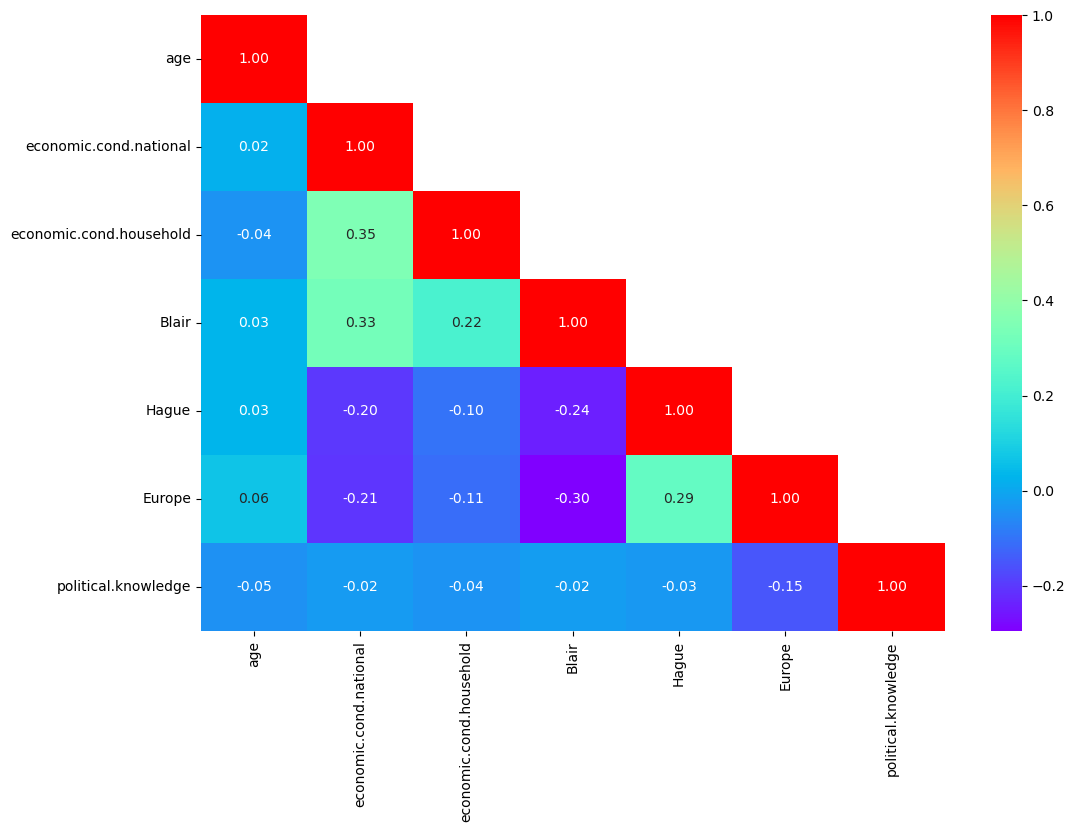

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,0:13].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:13].corr(),+1))
plt.show()


**Univariate Analysis**

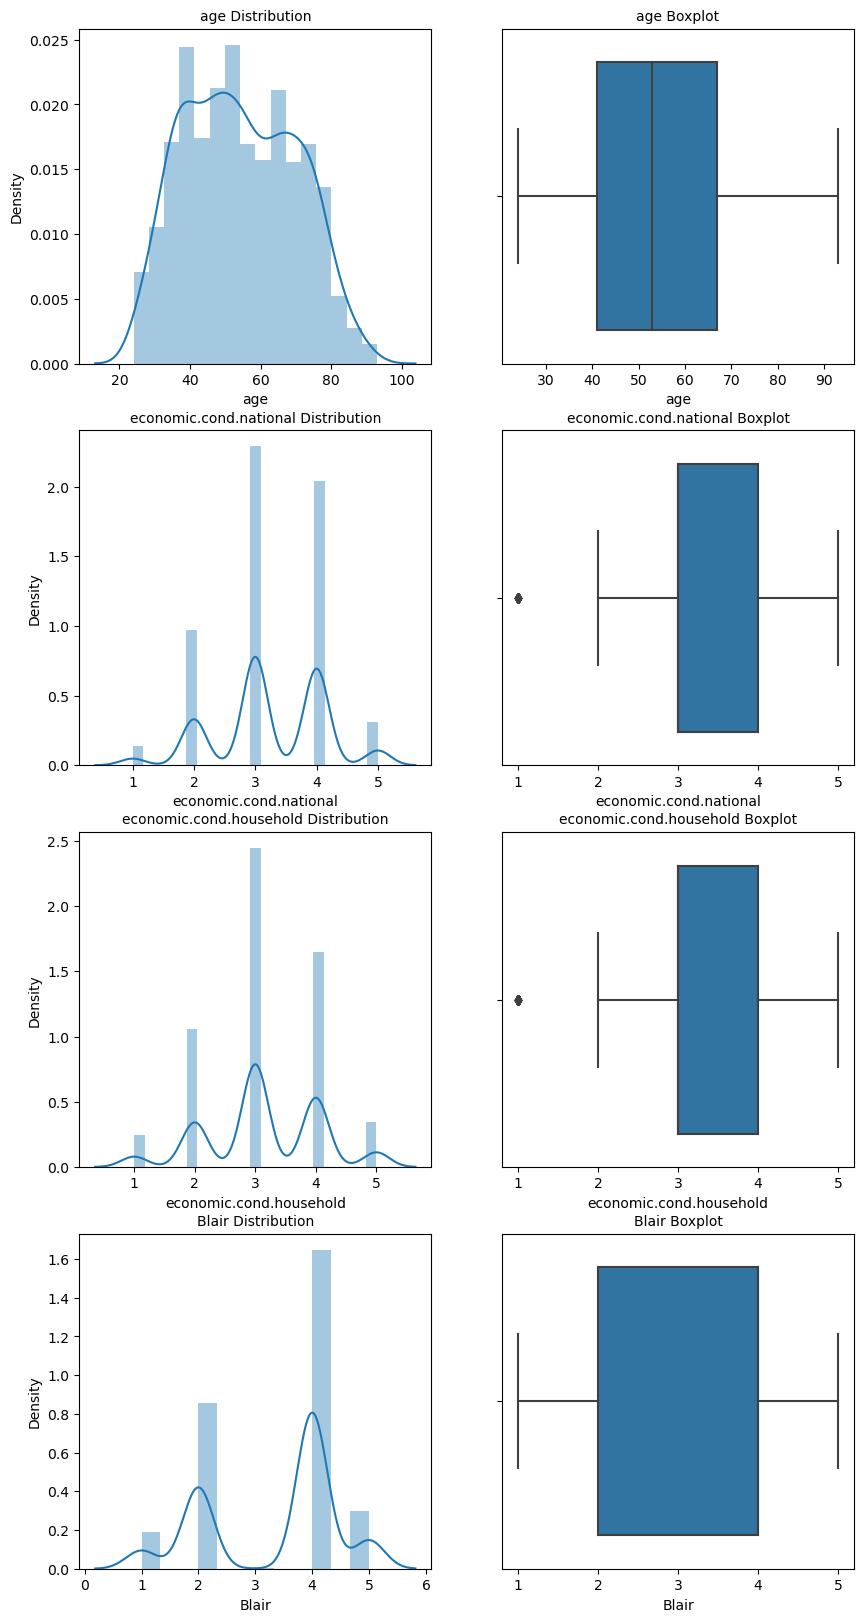

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

plt.show()

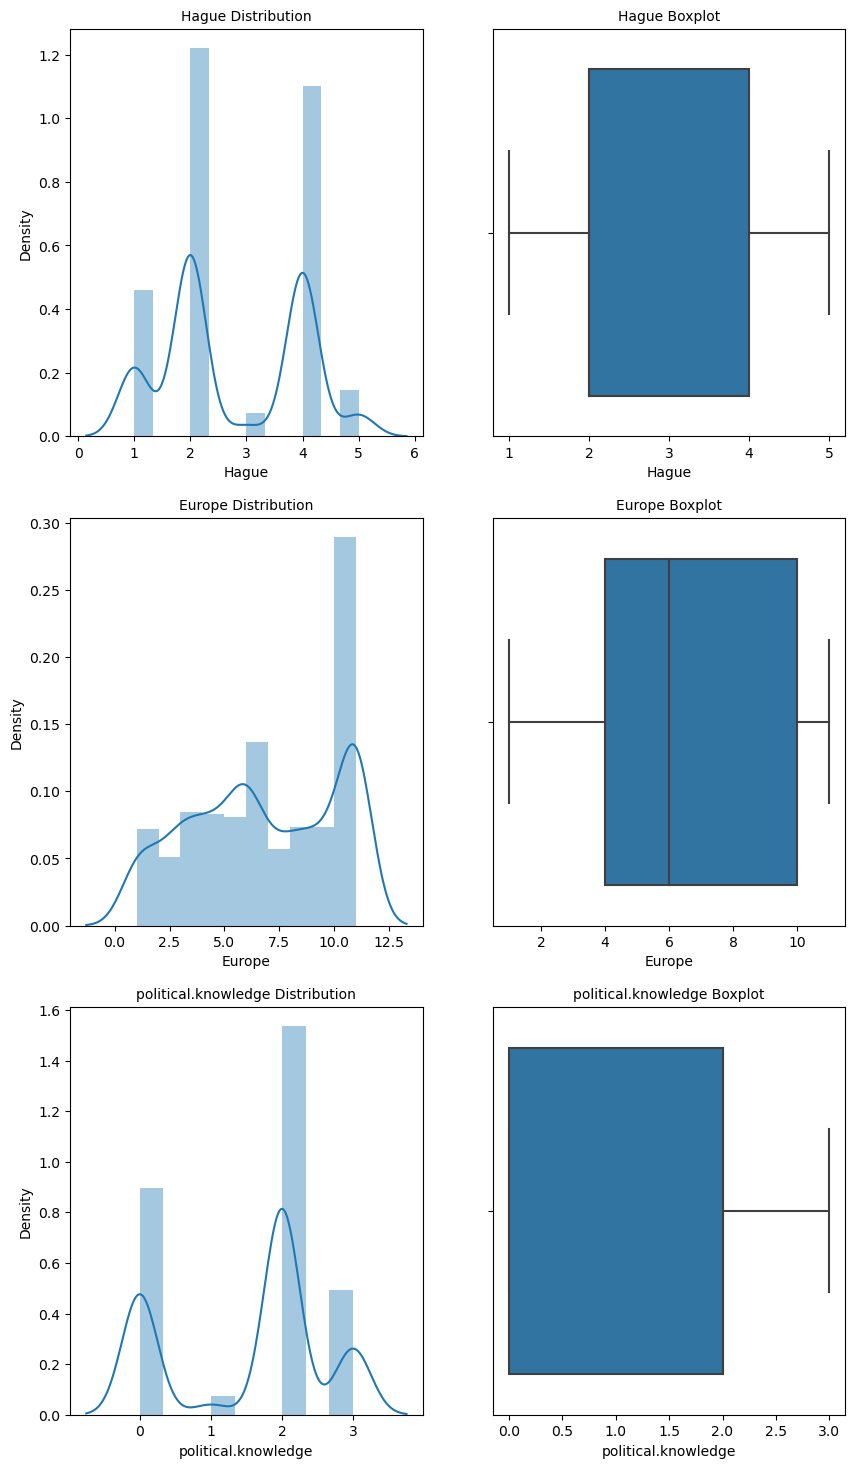

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge Boxplot",fontsize=10)
plt.show()

**Bivariate Analysis**

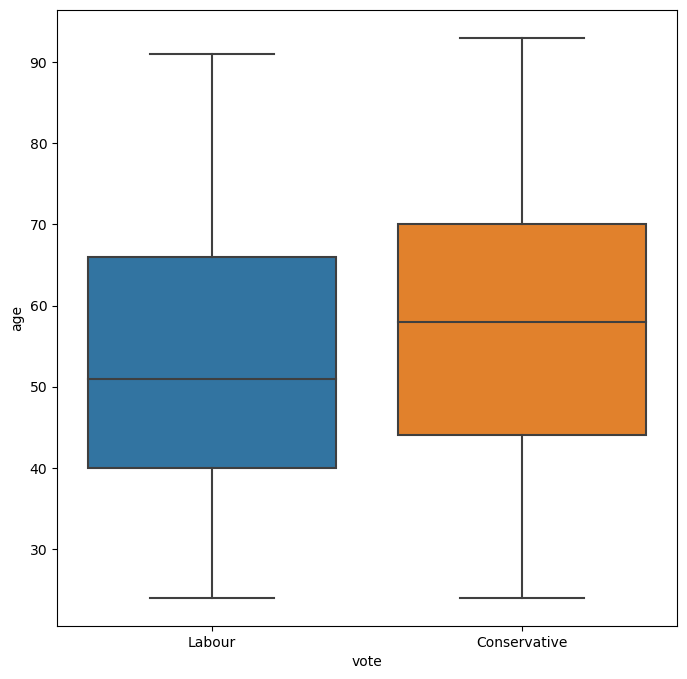

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['age']) 
plt.show()

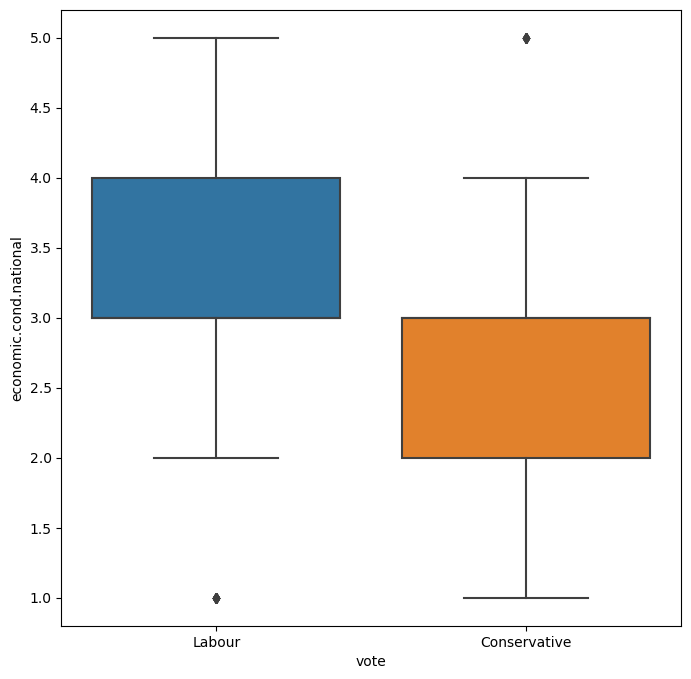

In [18]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['economic.cond.national']) 
plt.show()

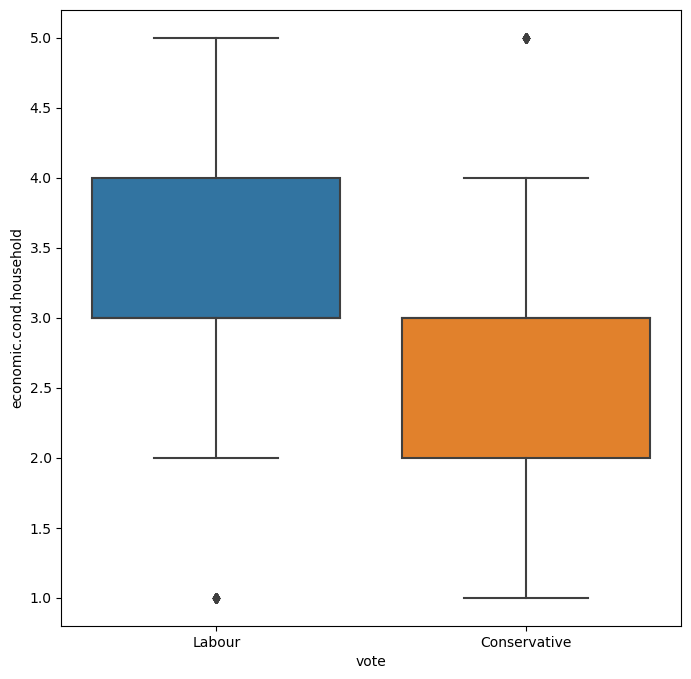

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['economic.cond.household']) 
plt.show()

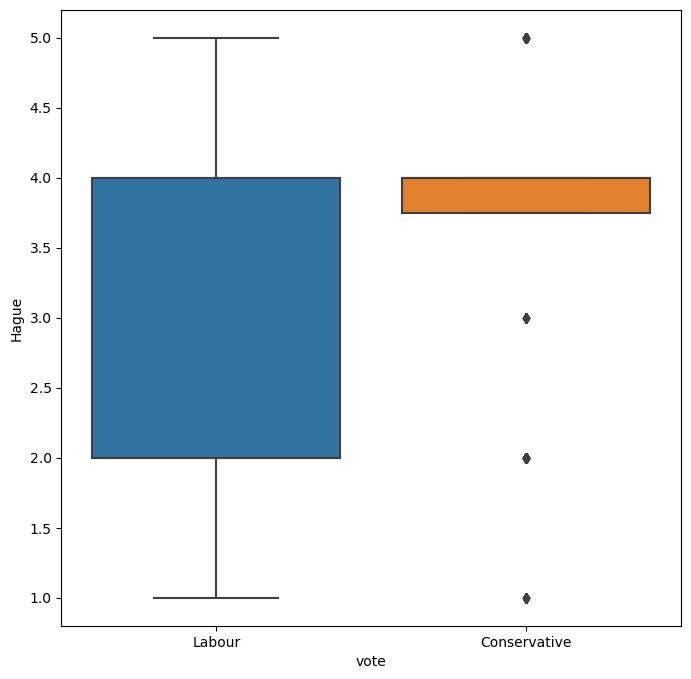

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['Hague']) 
plt.show()

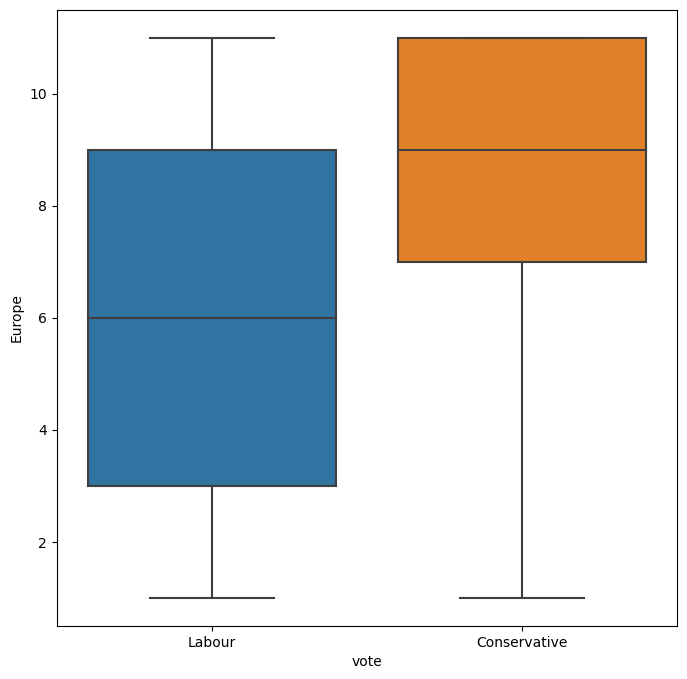

In [21]:
plt.figure(figsize=(8,8))
sns.boxplot(df["vote"], df['Europe']) 
plt.show()

**Outlier treatment**

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

<AxesSubplot:>

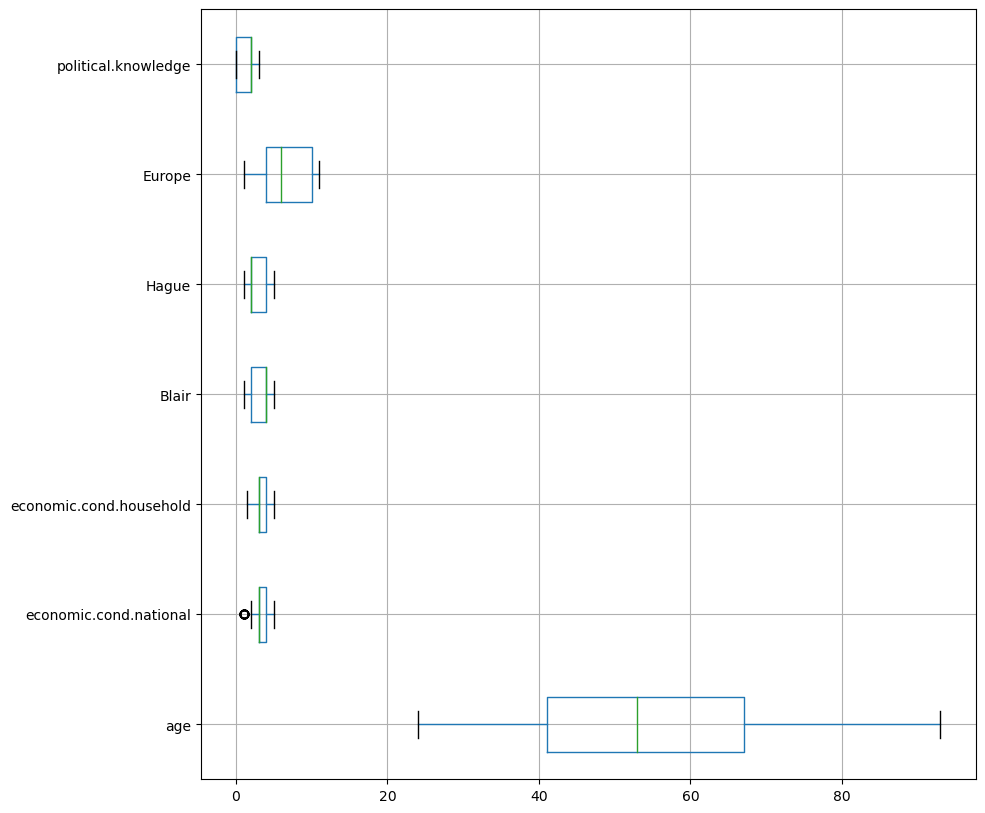

In [24]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

In [25]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

<AxesSubplot:>

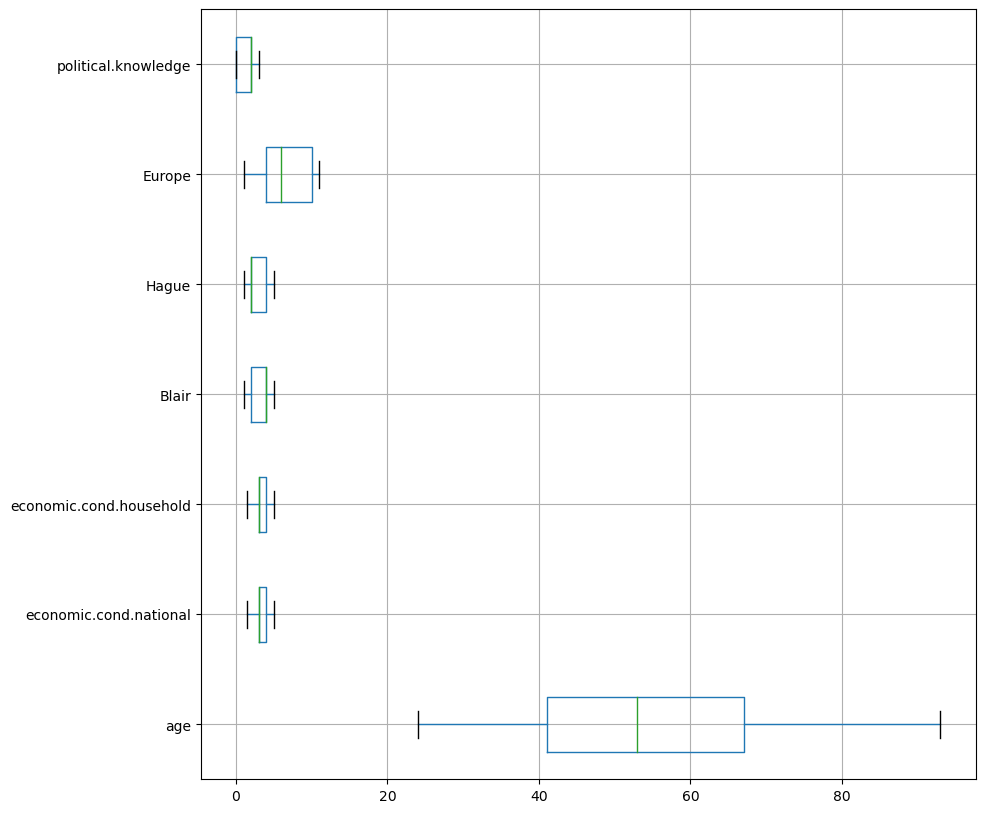

In [26]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

#### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [27]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3.0,3.0,4,1,2,2,female
2,Labour,36,4.0,4.0,4,4,5,2,male
3,Labour,35,4.0,4.0,5,2,3,2,male
4,Labour,24,4.0,2.0,2,1,4,0,female
5,Labour,41,2.0,2.0,1,1,6,2,male


In [28]:
## Excluding vote
cat

['vote', 'gender']

In [29]:
cat1 = ['vote', 'gender']

In [30]:
## Converting the other 'object' type variables as dummy variables

df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,43,3.0,3.0,4,1,2,2,1,0
2,36,4.0,4.0,4,4,5,2,1,1
3,35,4.0,4.0,5,2,3,2,1,1
4,24,4.0,2.0,2,1,4,0,1,0
5,41,2.0,2.0,1,1,6,2,1,1


In [31]:
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('vote_Labour', axis= 1)

# Copy target into the y dataframe. 
y = df_dummy['vote_Labour']

In [32]:
df.shape

(1517, 9)

In [33]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

#### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


**Logistic Regression**

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [35]:
# Fit the Logistic Regression model
model = LogisticRegression(solver = 'newton-cg', max_iter=10000, penalty='none')
model.fit(X_train , y_train)

LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg')

In [36]:
## Predicting on Training and Test dataset

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [37]:
ytest_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [38]:
# Accuracy - Training Data
model.score(X_train,y_train)

0.8341187558906692

In [39]:
# Accuracy - Testing Data
model.score(X_test,y_test)

0.8289473684210527

In [40]:
print(classification_report(y_train,ytrain_predict))
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



**LDA Model**

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [43]:
#intercept value
clf.intercept_ 

array([2.48812725])

In [44]:
# Accuracy - Training Data
model.score(X_train,y_train)

0.8341187558906692

In [45]:
# Accuracy - Testing Data
model.score(X_test,y_test)

0.831140350877193

In [46]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [47]:
from sklearn import metrics

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



#### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


**Gaussian Naive Bayes**

In [48]:
#from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [49]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [50]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [51]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



**KNN Model**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8576814326107446
[[210  97]
 [ 54 700]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [54]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[100  53]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



**Default value n_neighbors=5, lets check the performance for K=7**

In [55]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[204 103]
 [ 56 698]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [57]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[ 98  55]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       153
           1       0.83      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [58]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.20833333333333337,
 0.17763157894736847,
 0.17763157894736847,
 0.19298245614035092,
 0.19517543859649122,
 0.1907894736842105,
 0.19298245614035092,
 0.19956140350877194,
 0.19736842105263153]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

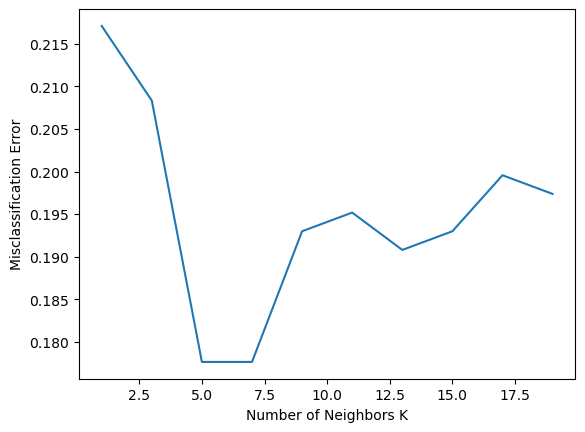

In [59]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 7 it is giving the best test accuracy.

#### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.


**Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [61]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [62]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



**Bagging**

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [64]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



**Boosting**

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [66]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)


**Accuracy**

In [67]:
# Accuracy - Training Data
model.score(X_train,y_train)

0.8341187558906692

In [68]:
# Accuracy - Testing Data
model.score(X_test,y_test)

0.831140350877193

**Confusion Matrix**

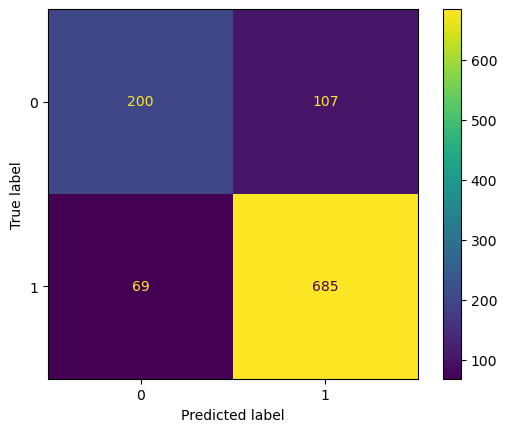

In [69]:
plot_confusion_matrix(model,X_train,y_train);

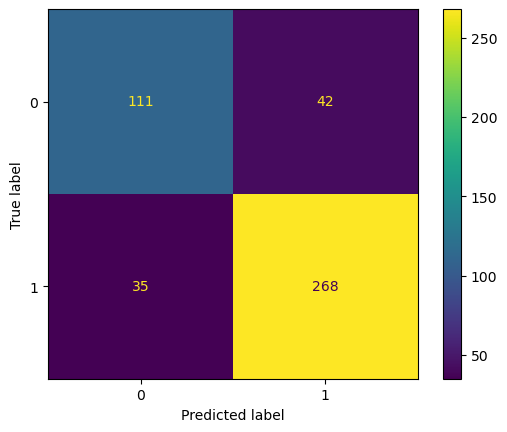

In [70]:
plot_confusion_matrix(model,X_test,y_test);

**classification report**

In [71]:
from sklearn import metrics

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



**AUC and ROC for the training data**

AUC: 0.889942024728052


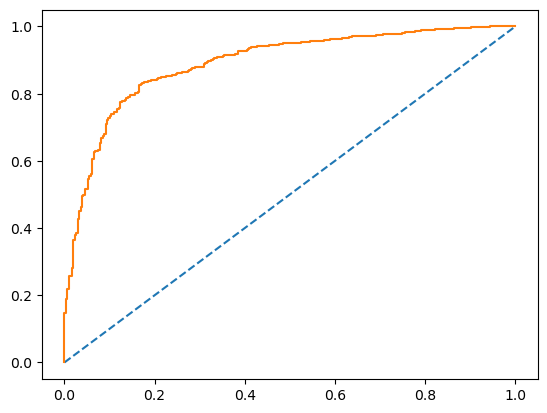

In [72]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:,1]
auc = roc_auc_score(y_train,probs)
print('AUC:',auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,probs)
# plot the roc curve for the model
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr , train_tpr);

**AUC and ROC for the test data**


AUC: 0.890


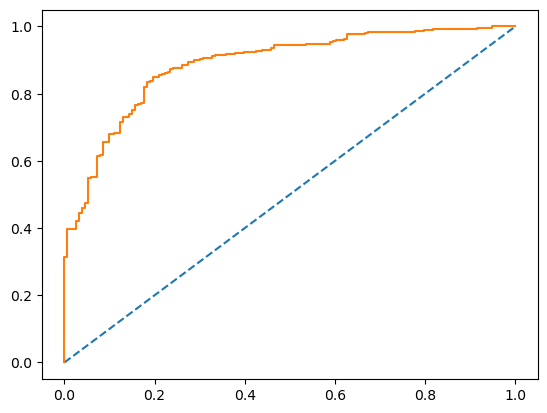

In [73]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr , test_tpr);

### Problem 2

**In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:**

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

#### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)


In [74]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
#nltk.download('stopwords')
#nltk.download('punkt')

In [75]:
import nltk
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import inaugural
inaugural.fileids()
President_Roosevelt=inaugural.raw('1941-Roosevelt.txt')
President_Kennedy=inaugural.raw('1961-Kennedy.txt')
President_Nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to C:\Users\Susmita
[nltk_data]     Sarkar\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Susmita
[nltk_data]     Sarkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Susmita
[nltk_data]     Sarkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
# Get the speech of President Franklin D. Roosevelt in 1941
fd_roosevelt_speech = nltk.corpus.inaugural.words('1941-Roosevelt.txt')
fd_roosevelt_raw = nltk.corpus.inaugural.raw('1941-Roosevelt.txt')
fd_roosevelt_sents = nltk.corpus.inaugural.sents('1941-Roosevelt.txt')

# Get the speech of President John F. Kennedy in 1961
jfk_speech = nltk.corpus.inaugural.words('1961-Kennedy.txt')
jfk_raw = nltk.corpus.inaugural.raw('1961-Kennedy.txt')
jfk_sents = nltk.corpus.inaugural.sents('1961-Kennedy.txt')

# Get the speech of President Richard Nixon in 1973
nixon_speech = nltk.corpus.inaugural.words('1973-Nixon.txt')
nixon_raw = nltk.corpus.inaugural.raw('1973-Nixon.txt')
nixon_sents = nltk.corpus.inaugural.sents('1973-Nixon.txt')

In [77]:
# Print the counts for each speech
print("Speech of President Franklin D. Roosevelt in 1941:")
print("- Number of characters:", len(fd_roosevelt_raw))
print("- Number of words:", len(fd_roosevelt_speech))
print("- Number of sentences:", len(fd_roosevelt_sents))

print("\nSpeech of President John F. Kennedy in 1961:")
print("- Number of characters:", len(jfk_raw))
print("- Number of words:", len(jfk_speech))
print("- Number of sentences:", len(jfk_sents))

print("\nSpeech of President Richard Nixon in 1973:")
print("- Number of characters:", len(nixon_raw))
print("- Number of words:", len(nixon_speech))
print("- Number of sentences:", len(nixon_sents))

Speech of President Franklin D. Roosevelt in 1941:
- Number of characters: 7571
- Number of words: 1536
- Number of sentences: 68

Speech of President John F. Kennedy in 1961:
- Number of characters: 7618
- Number of words: 1546
- Number of sentences: 52

Speech of President Richard Nixon in 1973:
- Number of characters: 9991
- Number of words: 2028
- Number of sentences: 69


In [78]:
nltk.FreqDist(inaugural.words())

FreqDist({'the': 9555, ',': 7275, 'of': 7169, 'and': 5226, '.': 5011, 'to': 4477, 'in': 2604, 'a': 2229, 'our': 2062, 'that': 1769, ...})

In [79]:
nltk.FreqDist(inaugural.words()).most_common(20)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769),
 ('be', 1505),
 ('is', 1477),
 ('we', 1281),
 ('for', 1141),
 ('by', 1063),
 ('it', 1036),
 ('have', 1029),
 ('which', 1007),
 ('not', 972),
 ('will', 935)]

In [80]:
all_words=[]
def lower(x):
    for w in x.words():
        words=w.lower()
        all_words.append(words)
        
lower(inaugural)
all_words


['fellow',
 '-',
 'citizens',
 'of',
 'the',
 'senate',
 'and',
 'of',
 'the',
 'house',
 'of',
 'representatives',
 ':',
 'among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.',
 'on',
 'the',
 'one',
 'hand',
 ',',
 'i',
 'was',
 'summoned',
 'by',
 'my',
 'country',
 ',',
 'whose',
 'voice',
 'i',
 'can',
 'never',
 'hear',
 'but',
 'with',
 'veneration',
 'and',
 'love',
 ',',
 'from',
 'a',
 'retreat',
 'which',
 'i',
 'had',
 'chosen',
 'with',
 'the',
 'fondest',
 'predilection',
 ',',
 'and',
 ',',
 'in',
 'my',
 'flattering',
 'hopes',
 ',',
 'with',
 'an',
 'immutable',
 'decision',
 ',',
 'as',
 'the',
 'asylum',
 'of',
 'my',
 'declining',
 'years',
 '--',
 'a',
 'retreat

#### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.


In [81]:
# Load the three speeches
roosevelt_words = inaugural.words('1941-Roosevelt.txt')
kennedy_words = inaugural.words('1961-Kennedy.txt')
nixon_words = inaugural.words('1973-Nixon.txt')

In [82]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [83]:
all_words_clean=[]
def clean(x):
    for word in x:
        if word not in stopwords:
            all_words_clean.append(word)
            
clean(all_words)
all_words_clean

['fellow',
 'citizens',
 'senate',
 'house',
 'representatives',
 'among',
 'vicissitudes',
 'incident',
 'life',
 'event',
 'could',
 'filled',
 'greater',
 'anxieties',
 'notification',
 'transmitted',
 'order',
 'received',
 '14th',
 'day',
 'present',
 'month',
 'one',
 'hand',
 'summoned',
 'country',
 'whose',
 'voice',
 'never',
 'hear',
 'veneration',
 'love',
 'retreat',
 'chosen',
 'fondest',
 'predilection',
 'flattering',
 'hopes',
 'immutable',
 'decision',
 'asylum',
 'declining',
 'years',
 '--',
 'retreat',
 'rendered',
 'every',
 'day',
 'necessary',
 'well',
 'dear',
 'addition',
 'habit',
 'inclination',
 'frequent',
 'interruptions',
 'health',
 'gradual',
 'waste',
 'committed',
 'time',
 'hand',
 'magnitude',
 'difficulty',
 'trust',
 'voice',
 'country',
 'called',
 'sufficient',
 'awaken',
 'wisest',
 'experienced',
 'citizens',
 'distrustful',
 'scrutiny',
 'qualifications',
 'could',
 'overwhelm',
 'despondence',
 'one',
 'inheriting',
 'inferior',
 'endowment

In [84]:
roosevelt_words_cleaned = [word.lower() for word in roosevelt_words if word.lower() not in stopwords]
kennedy_words_cleaned = [word.lower() for word in kennedy_words if word.lower() not in stopwords]
nixon_words_cleaned = [word.lower() for word in nixon_words if word.lower() not in stopwords]

# Print word count before and after removing stopwords
print(f"Word count before removing stopwords: {len(roosevelt_words)}, {len(kennedy_words)}, {len(nixon_words)}")
print(f"Word count after removing stopwords: {len(roosevelt_words_cleaned)}, {len(kennedy_words_cleaned)}, {len(nixon_words_cleaned)}")


Word count before removing stopwords: 1536, 1546, 2028
Word count after removing stopwords: 657, 722, 853


In [85]:
# Print a sample sentence after removing stopwords
sample_sentence = " ".join(roosevelt_words_cleaned[100:150])
print(f"Sample sentence after removing stopwords: {sample_sentence}")

Sample sentence after removing stopwords: -- freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock -- acted acted quickly boldly decisively later years living years -- fruitful years people democracy brought us greater security hope better understanding life ideals measured material things vital present future


#### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)


In [86]:
all_words_freq=nltk.FreqDist(all_words_clean)
all_words_freq

FreqDist({'government': 600, 'people': 594, 'us': 502, 'must': 374, 'upon': 371, '--': 363, 'great': 346, 'world': 346, 'may': 343, 'states': 335, ...})

In [87]:
list(all_words_freq)[0:3]


['government', 'people', 'us']

In [88]:
word_features=[]
def common_features(x):
    for item in x.most_common(2000):
        word_features.append(item[0])

common_features(all_words_freq)
word_features


['government',
 'people',
 'us',
 'must',
 'upon',
 '--',
 'great',
 'world',
 'may',
 'states',
 'nation',
 'country',
 'shall',
 'every',
 'one',
 'peace',
 'new',
 'citizens',
 'power',
 'america',
 'public',
 'time',
 'would',
 'constitution',
 'united',
 'nations',
 'union',
 'freedom',
 'war',
 'free',
 'american',
 'let',
 'fellow',
 'national',
 'made',
 'good',
 'men',
 'make',
 'years',
 'well',
 'justice',
 'life',
 'without',
 'spirit',
 'rights',
 'never',
 'law',
 'congress',
 'laws',
 'work',
 'liberty',
 'right',
 'best',
 'duty',
 'hope',
 'interests',
 'know',
 'god',
 'today',
 'much',
 'many',
 'state',
 'among',
 'political',
 'history',
 'foreign',
 'long',
 'first',
 'man',
 'powers',
 'day',
 'future',
 'executive',
 'policy',
 'president',
 'principles',
 'progress',
 'part',
 'human',
 'within',
 'whole',
 'ever',
 'common',
 'duties',
 'support',
 'administration',
 'faith',
 'system',
 'far',
 'together',
 'confidence',
 'service',
 'purpose',
 'present',
 '

In [89]:
word_features[0:10]


['government',
 'people',
 'us',
 'must',
 'upon',
 '--',
 'great',
 'world',
 'may',
 'states']

#### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)


### Creating a Wordcloud

In [90]:
nltk.download('wordcloud')

[nltk_data] Error loading wordcloud: Package 'wordcloud' not found in
[nltk_data]     index


False

In [91]:
from nltk.corpus import stopwords

In [92]:
!pip install wordcloud

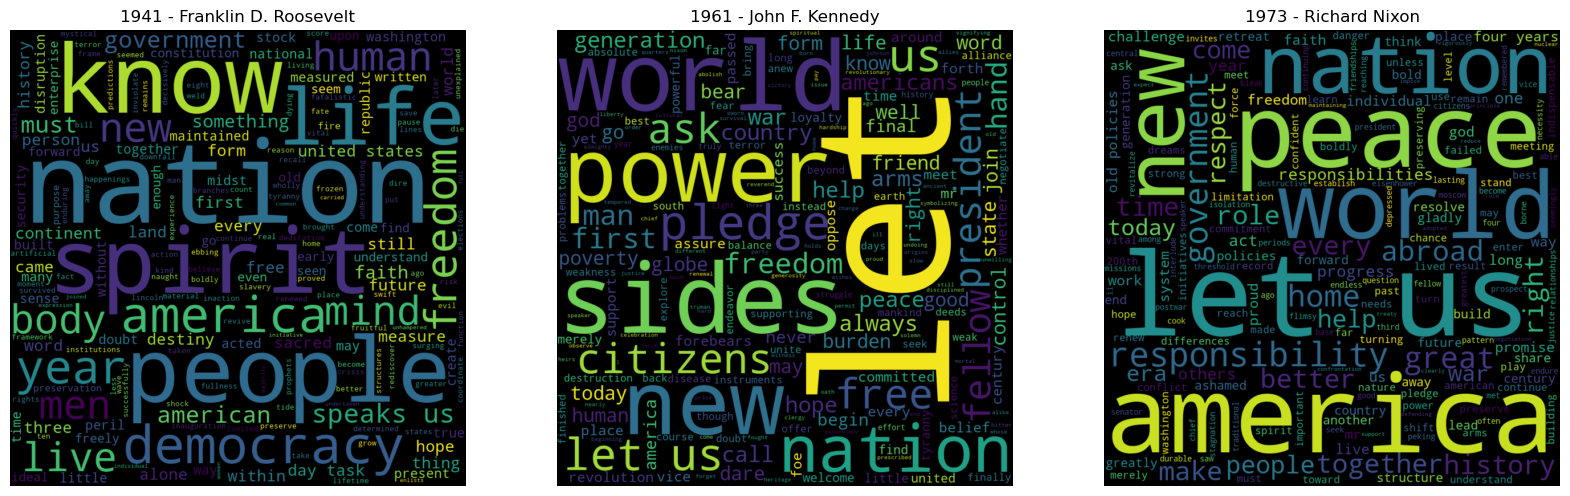

In [93]:
from wordcloud import WordCloud

fd_roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
fd_roosevelt_words = inaugural.words('1941-Roosevelt.txt')
fd_roosevelt_sents = inaugural.sents('1941-Roosevelt.txt')

jf_kennedy_raw = inaugural.raw('1961-Kennedy.txt')
jf_kennedy_words = inaugural.words('1961-Kennedy.txt')
jf_kennedy_sents = inaugural.sents('1961-Kennedy.txt')

rn_nixon_raw = inaugural.raw('1973-Nixon.txt')
rn_nixon_words = inaugural.words('1973-Nixon.txt')
rn_nixon_sents = inaugural.sents('1973-Nixon.txt')

stop_words = set(stopwords.words('english'))

fd_roosevelt_words_cleaned = [word.lower() for word in fd_roosevelt_words if word.lower() not in stop_words]
jf_kennedy_words_cleaned = [word.lower() for word in jf_kennedy_words if word.lower() not in stop_words]
rn_nixon_words_cleaned = [word.lower() for word in rn_nixon_words if word.lower() not in stop_words]

fd_roosevelt_wc = WordCloud(width=800, height=800, background_color='black').generate(' '.join(fd_roosevelt_words_cleaned))
jf_kennedy_wc = WordCloud(width=800, height=800, background_color='black').generate(' '.join(jf_kennedy_words_cleaned))
rn_nixon_wc = WordCloud(width=800, height=800, background_color='black').generate(' '.join(rn_nixon_words_cleaned))

plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(fd_roosevelt_wc, interpolation='bilinear')
plt.axis('off')
plt.title('1941 - Franklin D. Roosevelt')

plt.subplot(132)
plt.imshow(jf_kennedy_wc, interpolation='bilinear')
plt.axis('off')
plt.title('1961 - John F. Kennedy')

plt.subplot(133)
plt.imshow(rn_nixon_wc, interpolation='bilinear')
plt.axis('off')
plt.title('1973 - Richard Nixon')

plt.show()